In [1]:
import pandas as pd
import numpy as np

In [21]:
###合并TPM文件
# 定义文件名列表
file_names = ['gene-TPM-dgc10.txt', 'gene-TPM-untreated87.txt', 'gene-TPM-other178.txt']

# 初始化一个空的列表用于存储读取的DataFrame
dfs = []

# 遍历每个文件
for file_name in file_names:
    # 读取文件，将第一列作为索引
    df = pd.read_csv(file_name, sep='\s+', engine='python', index_col=0)
    # 将读取的DataFrame添加到列表中
    dfs.append(df)

# 使用 pd.concat 合并所有DataFrame按列（横向）合并
df_combined = pd.concat(dfs, axis=1, join='outer')

# 删除重复的索引，keep='first' 保留第一次出现的重复索引
df_unique = df_combined.loc[~df_combined.index.duplicated(keep='first')]

# 打印合并后且去重的DataFrame的行数和列数，包括索引
print(f"Rows: {df_unique.shape[0]}, Columns: {df_unique.shape[1]}")

# 显示合并后DataFrame的前几行以检查结果，包括索引
print(df_unique.head())

# 将清理后的数据保存到新的文件中，包括索引
df_unique.to_csv('combined_TPM.txt', sep=' ', index=True)

Rows: 60708, Columns: 275
                    SRR20324018.genes.results  SRR20324019.genes.results  \
gene                                                                       
ENSG00000000003.15                      31.40                      20.77   
ENSG00000000005.6                        2.13                       1.32   
ENSG00000000419.14                      89.29                      68.45   
ENSG00000000457.14                       3.53                       2.76   
ENSG00000000460.17                      24.08                      39.20   

                    SRR20324024.genes.results  SRR20324025.genes.results  \
gene                                                                       
ENSG00000000003.15                      31.82                      30.23   
ENSG00000000005.6                        3.03                       3.27   
ENSG00000000419.14                      74.23                      78.72   
ENSG00000000457.14                       3.97                

In [22]:
###合并TPM文件
# 定义文件名列表
file_names = ['gene-count-dgc10.txt', 'gene-count-untreated87.txt', 'gene-count-other178.txt']

# 初始化一个空的列表用于存储读取的DataFrame
dfs = []

# 遍历每个文件
for file_name in file_names:
    # 读取文件，将第一列作为索引
    df = pd.read_csv(file_name, sep='\s+', engine='python', index_col=0)
    # 将读取的DataFrame添加到列表中
    dfs.append(df)

# 使用 pd.concat 合并所有DataFrame按列（横向）合并
df_combined = pd.concat(dfs, axis=1, join='outer')

# 删除重复的索引，keep='first' 保留第一次出现的重复索引
df_unique = df_combined.loc[~df_combined.index.duplicated(keep='first')]

# 打印合并后且去重的DataFrame的行数和列数，包括索引
print(f"Rows: {df_unique.shape[0]}, Columns: {df_unique.shape[1]}")

# 显示合并后DataFrame的前几行以检查结果，包括索引
print(df_unique.head())

# 将清理后的数据保存到新的文件中，包括索引
df_unique.to_csv('combined_count.txt', sep=' ', index=True)

Rows: 60708, Columns: 275
                    SRR20324018.genes.results  SRR20324019.genes.results  \
gene                                                                       
ENSG00000000003.15                     797.00                     554.00   
ENSG00000000005.6                       12.00                      11.00   
ENSG00000000419.14                     768.00                     529.00   
ENSG00000000457.14                     136.06                     104.66   
ENSG00000000460.17                     542.94                     529.34   

                    SRR20324024.genes.results  SRR20324025.genes.results  \
gene                                                                       
ENSG00000000003.15                     964.00                    1024.00   
ENSG00000000005.6                       31.00                      36.00   
ENSG00000000419.14                     727.84                     845.00   
ENSG00000000457.14                     156.27                

In [24]:
df_expr = pd.read_csv('/cluster/home/jialu/GBM/gsc/draw/combined_count.txt', sep=' ', index_col=0)
df_meta = pd.read_csv('/cluster/home/jialu/GBM/gsc/draw/meta_match.txt', sep=' ', index_col=0)


extracted_data = df_expr.loc[:,df_meta.index]
print(extracted_data.shape[1])
extracted_data.to_csv('/cluster/home/jialu/GBM/gsc/draw/meta_match_count.txt', sep='\t', index=True)


20


In [7]:
# 确保两个文件的索引列具有相同的列名
# 读取第一个文件，并将其设置为索引
df1 = pd.read_csv('gtf_filter.txt', sep='\s+', engine='python', index_col=1)

# 读取第二个文件，并将其设置为索引
df2 = pd.read_csv('combined_file.txt', sep=' ', index_col=0)

# 根据索引列合并两个 DataFrame
# how='outer' 表示进行外连接，保留所有索引，并用 NaN 填充缺失值
# how='inner' 表示进行内连接，只保留两个 DataFrame 都存在的索引
# how='left' 表示保留左侧 DataFrame 的索引
# how='right' 表示保留右侧 DataFrame 的索引
merged_df = pd.merge(df1, df2, left_index=True, right_index=True, how='inner')

# 打印合并后的 DataFrame 的行数和列数
print(f"行数: {len(merged_df)}, 列数: {merged_df.shape[1]}")

# 显示合并后的 DataFrame 的前几行
print(merged_df.head())

# 如果需要，将合并后的 DataFrame 保存到新的文件中
merged_df.to_csv('merged_file.txt', sep=' ', index=True)

行数: 60649, 列数: 275
                   num    gene_name                           gene_type  \
gene                                                                      
ENSG00000223972.5    1      DDX11L1  transcribed_unprocessed_pseudogene   
ENSG00000227232.5   13       WASH7P              unprocessed_pseudogene   
ENSG00000278267.1   26    MIR6859-1                               miRNA   
ENSG00000243485.5   29  MIR1302-2HG                              lncRNA   
ENSG00000284332.1   37    MIR1302-2                               miRNA   

                   SRR20324018.genes.results  SRR20324019.genes.results  \
gene                                                                      
ENSG00000223972.5                       0.00                       0.00   
ENSG00000227232.5                      18.86                      27.95   
ENSG00000278267.1                       0.00                       0.00   
ENSG00000243485.5                       0.00                       1.10   
ENSG0

In [44]:
# 假设 'gene_name' 是要设为索引的列的名称，'gene_type' 是包含基因类型信息的列的名称
# 读取文件，将 'gene_name' 列作为索引
df = pd.read_csv('merged_file.txt', sep=' ', index_col='gene_name', engine='python')

# 选择 'gene_type' 列为 'protein_coding' 的行
df_protein_coding = df[df['gene_type'] == 'protein_coding']

# 删除 'num' 和 'gene' 列，如果这些列存在的话
# 如果列名不是 'num' 和 'gene'，请将它们替换为正确的列名
df_protein_coding = df_protein_coding.drop(['num', 'gene', 'gene_type'], axis=1, errors='ignore')

# 显示修改后的 DataFrame 的前几行
print(df_protein_coding.head())

# 将修改后的 DataFrame 保存到新的文件中
# 这里 sep=' ' 设置了列之间的分隔符为一个空格，index=True 表示保存索引列
df_protein_coding.to_csv('filtered_protein_coding.txt', sep=' ', index=True)

           SRR20324018.genes.results  SRR20324019.genes.results   
gene_name                                                         
OR4F5                           0.00                       0.00  \
OR4F29                          0.00                       0.00   
OR4F16                          0.00                       0.00   
SAMD11                        128.52                     163.12   
NOC2L                         100.92                      93.23   

           SRR20324024.genes.results  SRR20324025.genes.results   
gene_name                                                         
OR4F5                           0.00                       0.00  \
OR4F29                          0.00                       0.00   
OR4F16                          0.00                       0.00   
SAMD11                        136.17                     121.37   
NOC2L                          99.73                      76.18   

           SRR5894155.genes.results  SRR5894157.genes.result

In [4]:
# 读取文件，这里假设 'gene_name' 是索引列的名称
df = pd.read_csv('filtered_protein_coding.txt', sep=' ', index_col='gene_name', engine='python')

#将索引列按照从大到小的顺序排列
df_sorted = df.sort_index(ascending=False)

# 根据索引列（即 'gene_name'）分组，并对每个组应用 mean 函数计算均值
df_mean = df_sorted.groupby(level=0).mean()

# 打印计算均值后的 DataFrame 的行数和列数
print(f"行数: {df_mean.shape[0]}, 列数: {df_mean.shape[1]}")

# 显示计算均值后的 DataFrame 的前几行
#print(df_mean.head())

# 将计算均值后的 DataFrame 保存到新的文件中
df_mean.to_csv('mean_values_by_gene.txt', sep=' ', index=True)

行数: 19930, 列数: 272


Gene expression DataFrame created successfully.
Metadata DataFrame created successfully.
df_meta has been reindexed to match the order of df_expr's columns.
                                 PC1        PC2
SRR20324018.genes.results -62.438021   2.493346
SRR20324019.genes.results -89.379957  20.203469
SRR20324024.genes.results -48.313422 -12.346909
SRR20324025.genes.results -34.631789  -6.824060
SRR5894155.genes.results   81.054587  -2.635877
...                              ...        ...
SRR8723377.genes.results  -40.238882  -0.226545
SRR8723378.genes.results  -42.916123   1.662146
SRR8723379.genes.results  -38.001529   0.480732
SRR9847710.genes.results   -7.465557 -18.063278
SRR9847713.genes.results  -14.050927 -18.118284

[272 rows x 2 columns]


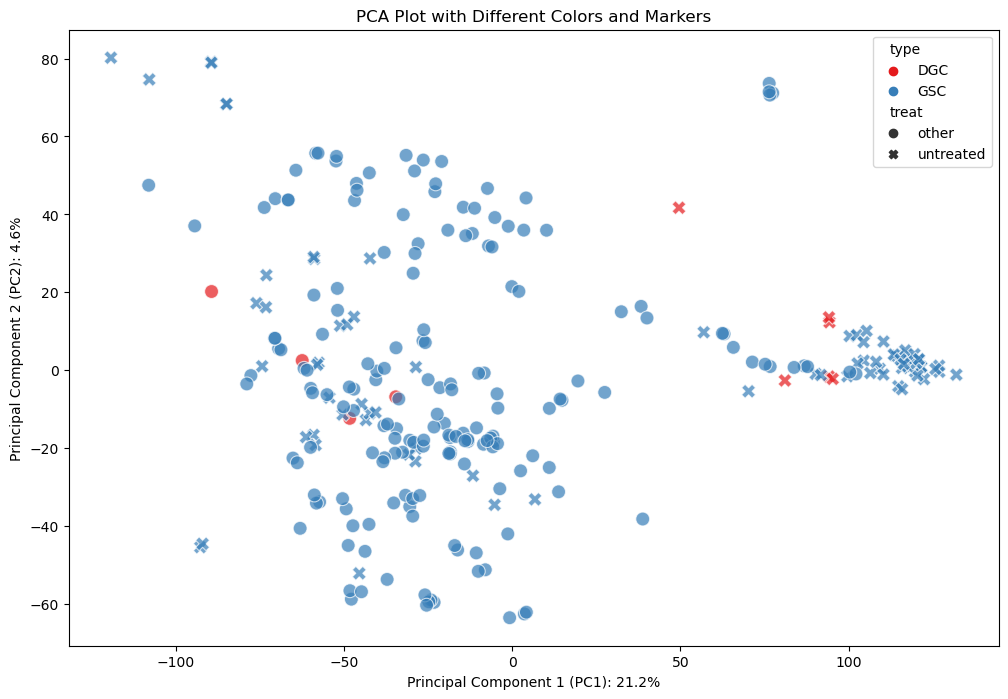

In [3]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
# 读取基因表达数据文件，假设第一列是样本名，设为索引
try:
    df_expr = pd.read_csv('mean_values_by_gene.txt', sep=' ', index_col=0)
    print("Gene expression DataFrame created successfully.")
except Exception as e:
    print(f"Error creating gene expression DataFrame: {e}")

# 读取包含样本标签的元数据文件
try:
    df_meta = pd.read_csv('meta.txt', sep='\t', index_col=0)
    print("Metadata DataFrame created successfully.")
except Exception as e:
    print(f"Error creating Metadata DataFrame: {e}")

# 确保df_meta的索引与df_expr的列名匹配
if not df_meta.index.equals(df_expr.columns):
    # 获取df_expr的列名作为样本顺序
    sample_order = df_expr.columns
    
    # 重新排序df_meta以匹配df_expr的列顺序
    df_meta = df_meta.reindex(sample_order)
    
    print("df_meta has been reindexed to match the order of df_expr's columns.")
# 转置基因表达DataFrame，使得样本成为列，基因表达成为行
df_transposed = df_expr.T

# 使用StandardScaler进行缩放
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_transposed)

# 创建PCA对象，选择保留的主成分数量，例如2
pca = PCA(n_components=2)

# 拟合PCA并转换数据到降维后的空间
X_pca = pca.fit_transform(df_scaled)
df_pca_results = pd.DataFrame(X_pca, columns=['PC1', 'PC2'], index=df_transposed.index)
print(df_pca_results)

# 计算每个主成分的方差贡献百分比
explained_variance = pca.explained_variance_ratio_ * 100

# 使用元数据为PCA结果上色和标记形状
color = df_meta['type']
markers = df_meta['treat']
# 绘制PCA散点图
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=color, style=markers, palette='Set1', s=100, alpha=0.7)

# 设置X轴和Y轴的标签，显示PC1和PC2的方差贡献百分比
plt.xlabel(f'Principal Component 1 (PC1): {explained_variance[0]:.1f}%')
plt.ylabel(f'Principal Component 2 (PC2): {explained_variance[1]:.1f}%')

plt.title('PCA Plot with Different Colors and Markers')
# 显示图形
plt.show()


Gene expression DataFrame created successfully.
Metadata DataFrame created successfully.
df_meta has been reindexed to match the order of df_expr's columns.


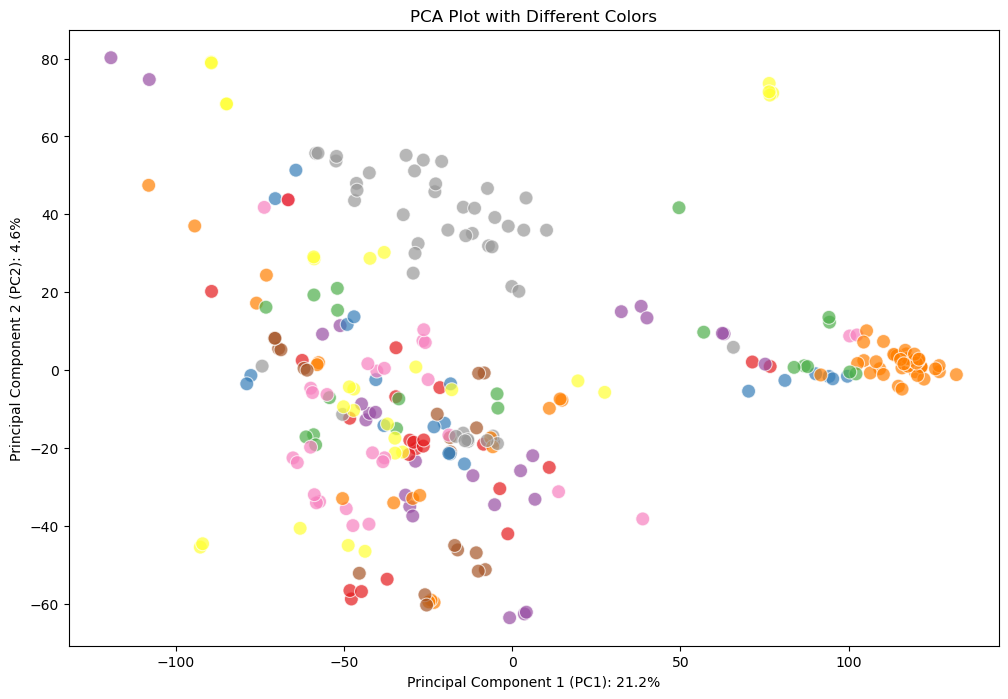

In [2]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
# 读取基因表达数据文件，假设第一列是样本名，设为索引
try:
    df_expr = pd.read_csv('mean_values_by_gene.txt', sep=' ', index_col=0)
    print("Gene expression DataFrame created successfully.")
except Exception as e:
    print(f"Error creating gene expression DataFrame: {e}")

# 读取包含样本标签的元数据文件
try:
    df_meta = pd.read_csv('meta.txt', sep='\t', index_col=0)
    print("Metadata DataFrame created successfully.")
except Exception as e:
    print(f"Error creating Metadata DataFrame: {e}")

# 确保df_meta的索引与df_expr的列名匹配
if not df_meta.index.equals(df_expr.columns):
    # 获取df_expr的列名作为样本顺序
    sample_order = df_expr.columns
    
    # 重新排序df_meta以匹配df_expr的列顺序
    df_meta = df_meta.reindex(sample_order)
    
    print("df_meta has been reindexed to match the order of df_expr's columns.")
# 转置基因表达DataFrame，使得样本成为列，基因表达成为行
df_transposed = df_expr.T

# 使用StandardScaler进行缩放
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_transposed)

# 创建PCA对象，选择保留的主成分数量，例如2
pca = PCA(n_components=2)

# 拟合PCA并转换数据到降维后的空间
X_pca = pca.fit_transform(df_scaled)
df_pca_results = pd.DataFrame(X_pca, columns=['PC1', 'PC2'], index=df_transposed.index)
#print(df_pca_results)

# 计算每个主成分的方差贡献百分比
explained_variance = pca.explained_variance_ratio_ * 100

# 使用元数据为PCA结果上色和标记形状
color = df_meta['batch']

# 绘制PCA散点图
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=color, palette='Set1', s=100, alpha=0.7,legend=False)

# 设置X轴和Y轴的标签，显示PC1和PC2的方差贡献百分比
plt.xlabel(f'Principal Component 1 (PC1): {explained_variance[0]:.1f}%')
plt.ylabel(f'Principal Component 2 (PC2): {explained_variance[1]:.1f}%')

plt.title('PCA Plot with Different Colors')
# 显示图形
plt.show()


DGC and untreated: 6
DGC and other: 4
GSC and untreated: 84
GSC and other: 178


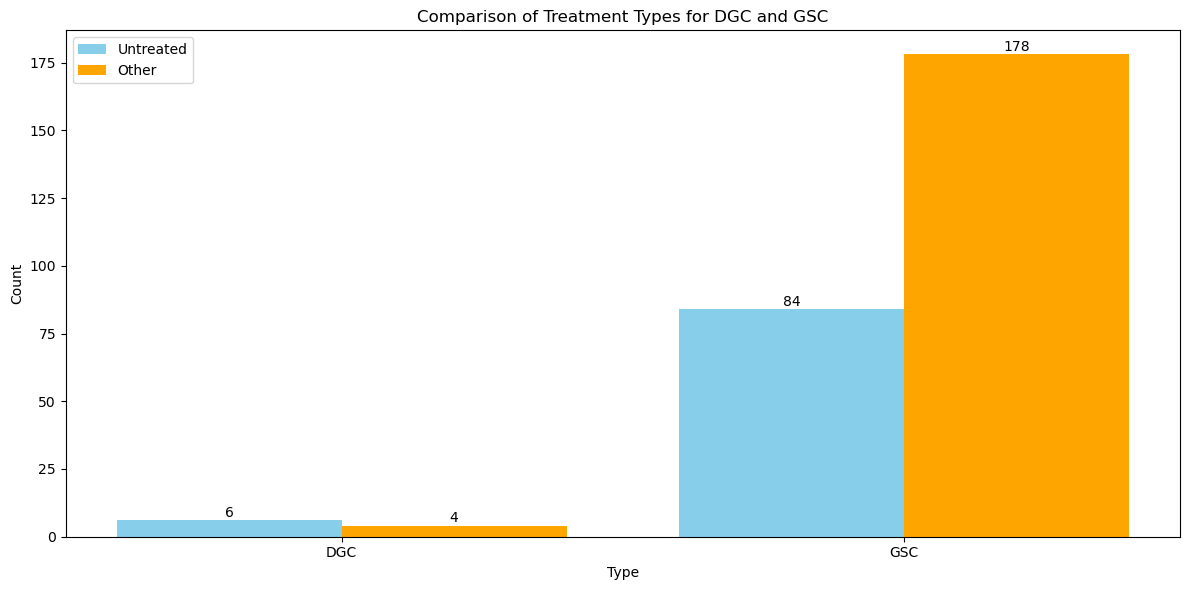

In [9]:
# 初始化计数器
count_DGC_untreated = 0
count_DGC_other = 0
count_GSC_untreated = 0
count_GSC_other = 0

# 打开文件并逐行读取
with open('meta.txt', 'r') as file:
    for line in file:
        # 假设每行数据是以逗号分隔的
        parts = line.strip().split('\t')
        # 检查是否有足够的部分来处理
        if len(parts) >= 2:
            type_value = parts[1].strip()  # 假设type是第一列
            treat_value = parts[2].strip()# 假设treat是第二列
            
            # 根据条件增加计数器
            if type_value == 'DGC':
                if treat_value == 'untreated':
                    count_DGC_untreated += 1
                elif treat_value == 'other':
                    count_DGC_other += 1
            elif type_value == 'GSC':
                if treat_value == 'untreated':
                    count_GSC_untreated += 1
                elif treat_value == 'other':
                    count_GSC_other += 1

# 输出结果
print(f"DGC and untreated: {count_DGC_untreated}")
print(f"DGC and other: {count_DGC_other}")
print(f"GSC and untreated: {count_GSC_untreated}")
print(f"GSC and other: {count_GSC_other}")


# 创建柱状图的数据
categories = ['DGC', 'GSC']
untreated_counts = [count_DGC_untreated, count_GSC_untreated]
other_counts = [count_DGC_other, count_GSC_other]

# 设置柱状图的x轴位置和宽度
bar_width = 0.4  # 柱子的宽度
index = np.arange(len(categories))  # 获取类别的索引

# 创建图形和轴
plt.figure(figsize=(12, 6))

# 添加'untreated'的条形
plt.bar(index, untreated_counts, bar_width, label='Untreated', color='skyblue')

# 添加'other'的条形，每个条形位于前一个条形的右侧
plt.bar(index + bar_width, other_counts, bar_width, label='Other', color='orange')

# 添加图例
plt.legend()

# 添加标题和标签
plt.title('Comparison of Treatment Types for DGC and GSC')
plt.xlabel('Type')
plt.ylabel('Count')

# 设置x轴的刻度位置和刻度标签
plt.xticks(index + bar_width / 2, categories)

# 显示数值标签
for i in range(len(categories)):
    plt.text(index[i], untreated_counts[i] + bar_width / 2, str(untreated_counts[i]), ha='center', va='bottom')
    plt.text(index[i] + bar_width, other_counts[i] + bar_width / 2, str(other_counts[i]), ha='center', va='bottom')

# 显示图形
plt.tight_layout()  # 调整布局以适应标签
plt.show()  # 显示图形

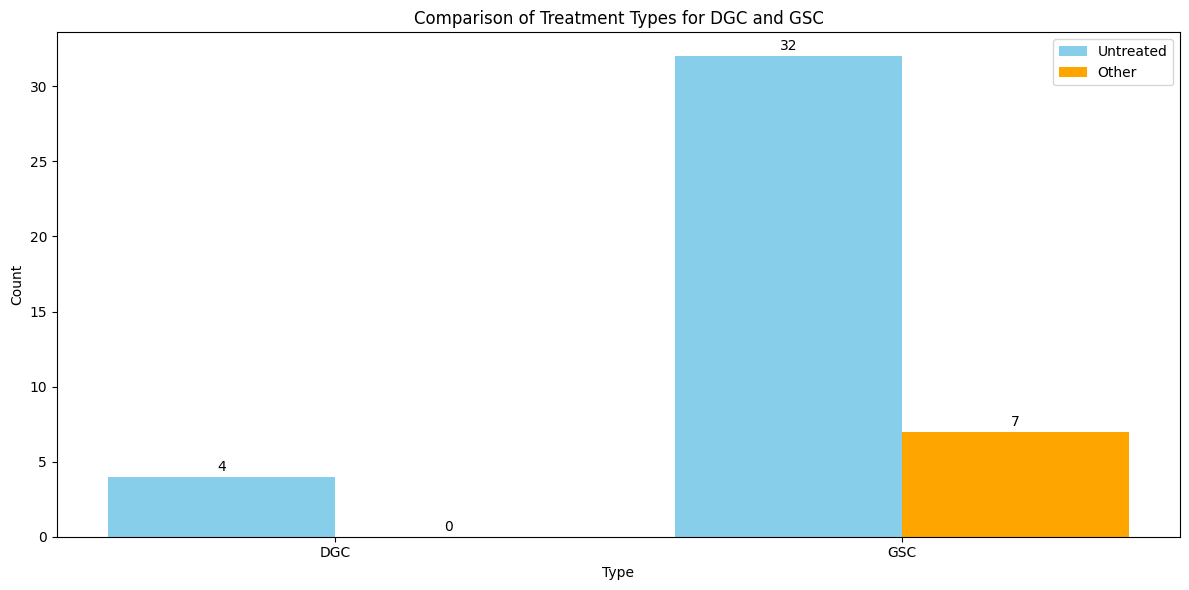

In [113]:
categories = ['DGC', 'GSC']

count_DGC_untreated = 4  
count_DGC_other = 0
count_GSC_untreated = 32 
count_GSC_other = 7  
untreated_counts = [count_DGC_untreated, count_GSC_untreated]
other_counts = [count_DGC_other, count_GSC_other]

# 设置柱状图的x轴位置和宽度
bar_width = 0.4  # 柱子的宽度
index = np.arange(len(categories))  # 获取类别的索引

# 创建图形和轴
plt.figure(figsize=(12, 6))

# 添加'untreated'的条形
plt.bar(index, untreated_counts, bar_width, label='Untreated', color='skyblue')

# 添加'other'的条形，每个条形位于前一个条形的右侧
plt.bar(index + bar_width, other_counts, bar_width, label='Other', color='orange')

# 添加图例
plt.legend()

# 添加标题和标签
plt.title('Comparison of Treatment Types for DGC and GSC')
plt.xlabel('Type')
plt.ylabel('Count')

# 设置x轴的刻度位置和刻度标签
plt.xticks(index + bar_width / 2, categories)

# 显示数值标签
for i in range(len(categories)):
    plt.text(index[i], untreated_counts[i] + bar_width / 2, str(untreated_counts[i]), ha='center', va='bottom')
    plt.text(index[i] + bar_width, other_counts[i] + bar_width / 2, str(other_counts[i]), ha='center', va='bottom')

# 显示图形
plt.tight_layout()  # 调整布局以适应标签
plt.show()  # 显示图形

In [27]:
###提取匹配的数据
df = pd.read_csv('filtered_protein_coding.txt', sep=' ', index_col='gene_name', engine='python')
df_meta = pd.read_csv('meta.txt', sep='\t', index_col=0)

#dgc_meta = df_meta[df_meta['type'] == 'DGC']
match_meta = df_meta[df_meta['batch'].isin(['batch2', 'batch3', 'batch4'])]

# 步骤2: 使用筛选出的 gene_name 来选择 df 中对应的列
# 由于 gene_name 是 df 的索引，我们可以直接使用 .loc 来选择列
match_filtered_protein_coding = df.loc[:, match_meta.index]

# 现在 dgc_data 包含了 df 中所有 DGC 类型的基因数据
match_filtered_protein_coding_sorted = match_filtered_protein_coding.sort_index(ascending=False)

# 根据索引列（即 'gene_name'）分组，并对每个组应用 mean 函数计算均值
match_filtered_protein_coding_mean = match_filtered_protein_coding_sorted.groupby(level=0).mean()
match_filtered_protein_coding_mean.to_csv('mean_values_by_gene_match.txt', sep=' ', index=True)
print(match_filtered_protein_coding_mean.shape[0])
match_meta.to_csv('meta_match.txt', sep=' ', index=True)

19930


Gene expression DataFrame created successfully.
Metadata DataFrame created successfully.


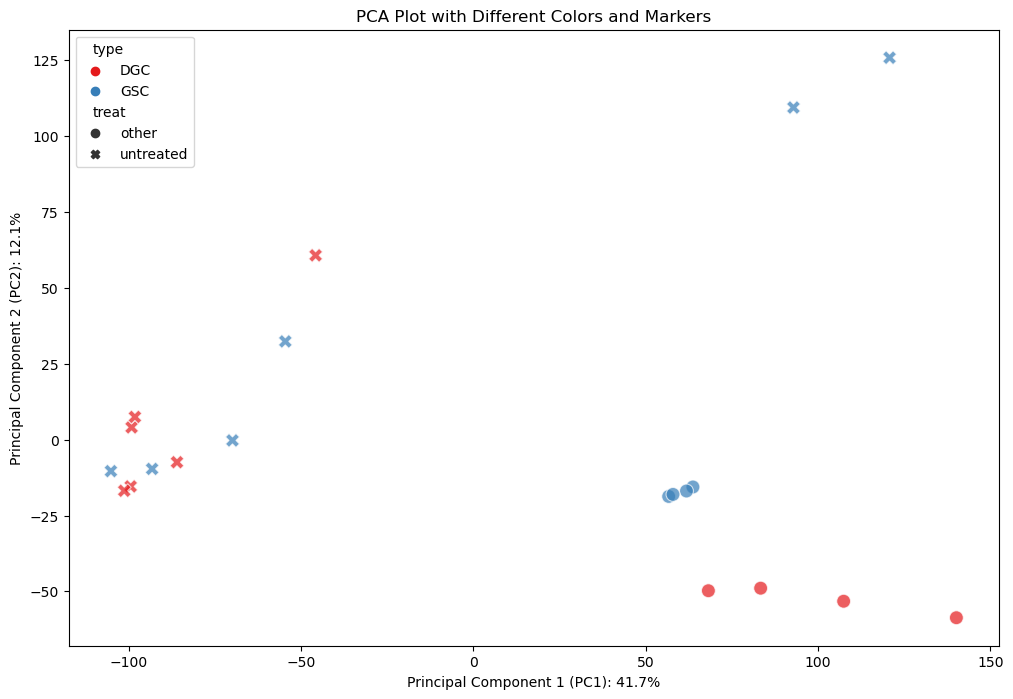

In [33]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
# 读取基因表达数据文件，假设第一列是样本名，设为索引
try:
    df_expr = pd.read_csv('mean_values_by_gene_match.txt', sep=' ', index_col=0)
    print("Gene expression DataFrame created successfully.")
except Exception as e:
    print(f"Error creating gene expression DataFrame: {e}")

# 读取包含样本标签的元数据文件
try:
    df_meta = pd.read_csv('meta.txt', sep='\t', index_col=0)
    match_meta = df_meta[df_meta['batch'].isin(['batch2', 'batch3', 'batch4'])]
    print("Metadata DataFrame created successfully.")

except Exception as e:
    print(f"Error creating Metadata DataFrame: {e}")

# 确保df_meta的索引与df_expr的列名匹配
if not match_meta.index.equals(df_expr.columns):
    # 获取df_expr的列名作为样本顺序
    sample_order = df_expr.columns

    # 重新排序df_meta以匹配df_expr的列顺序
    match_meta = match_meta.reindex(sample_order)
    print(match_meta)
    print("df_meta has been reindexed to match the order of df_expr's columns.")
# 转置基因表达DataFrame，使得样本成为列，基因表达成为行
df_transposed = df_expr.T

# 使用StandardScaler进行缩放
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_transposed)

# 创建PCA对象，选择保留的主成分数量，例如2
pca = PCA(n_components=2)

# 拟合PCA并转换数据到降维后的空间
X_pca = pca.fit_transform(df_scaled)
df_pca_results = pd.DataFrame(X_pca, columns=['PC1', 'PC2'], index=df_transposed.index)


# 计算每个主成分的方差贡献百分比
explained_variance = pca.explained_variance_ratio_ * 100

#使用元数据为PCA结果上色和标记形状
color = match_meta['type']
markers = match_meta['treat']

#绘制PCA散点图
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=color, style=markers, palette='Set1', s=100, alpha=0.7)

# 设置X轴和Y轴的标签，显示PC1和PC2的方差贡献百分比
plt.xlabel(f'Principal Component 1 (PC1): {explained_variance[0]:.1f}%')
plt.ylabel(f'Principal Component 2 (PC2): {explained_variance[1]:.1f}%')

plt.title('PCA Plot with Different Colors and Markers')
# 显示图形
plt.show()


Gene expression DataFrame created successfully.
Metadata DataFrame created successfully.


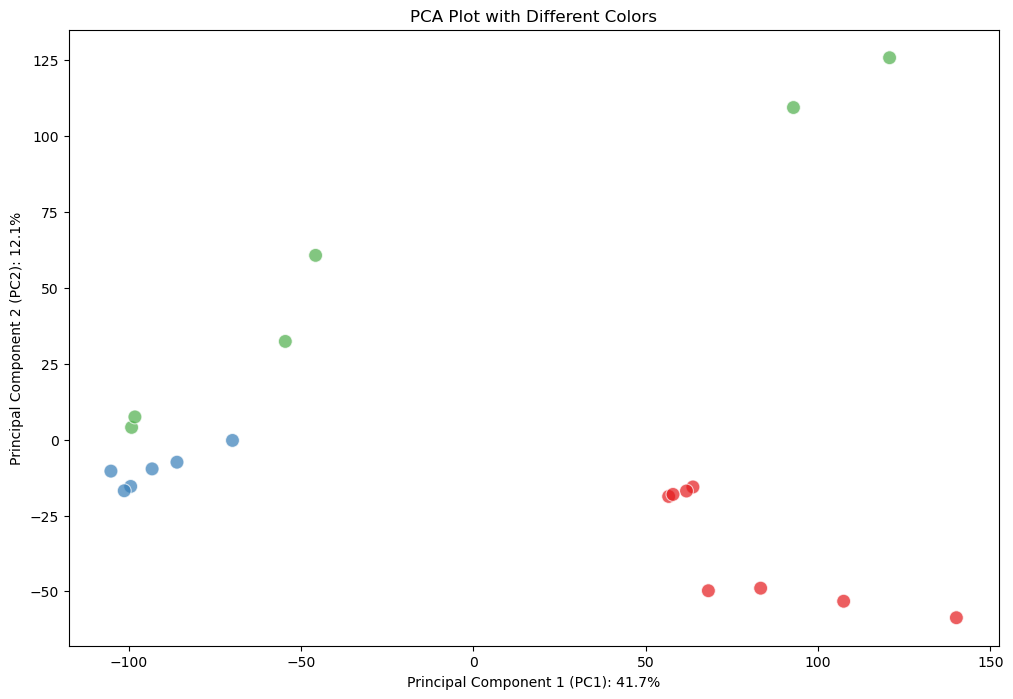

In [31]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
# 读取基因表达数据文件，假设第一列是样本名，设为索引
try:
    df_expr = pd.read_csv('mean_values_by_gene_match.txt', sep=' ', index_col=0)
    print("Gene expression DataFrame created successfully.")
except Exception as e:
    print(f"Error creating gene expression DataFrame: {e}")

# 读取包含样本标签的元数据文件
try:
    df_meta = pd.read_csv('meta.txt', sep='\t', index_col=0)
    match_meta = df_meta[df_meta['batch'].isin(['batch2', 'batch3', 'batch4'])]
    print("Metadata DataFrame created successfully.")
except Exception as e:
    print(f"Error creating Metadata DataFrame: {e}")

# 确保df_meta的索引与df_expr的列名匹配
if not match_meta.index.equals(df_expr.columns):
    # 获取df_expr的列名作为样本顺序
    sample_order = df_expr.columns
    
    # 重新排序df_meta以匹配df_expr的列顺序
    match_meta = match_meta.reindex(sample_order)
    
    print("match_meta has been reindexed to match the order of df_expr's columns.")
# 转置基因表达DataFrame，使得样本成为列，基因表达成为行
df_transposed = df_expr.T

# 使用StandardScaler进行缩放
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_transposed)

# 创建PCA对象，选择保留的主成分数量，例如2
pca = PCA(n_components=2)

# 拟合PCA并转换数据到降维后的空间
X_pca = pca.fit_transform(df_scaled)
df_pca_results = pd.DataFrame(X_pca, columns=['PC1', 'PC2'], index=df_transposed.index)
#print(df_pca_results)

# 计算每个主成分的方差贡献百分比
explained_variance = pca.explained_variance_ratio_ * 100

# 使用元数据为PCA结果上色和标记形状
color = match_meta['batch']

# 绘制PCA散点图
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=color, palette='Set1', s=100, alpha=0.7,legend=False)

# 设置X轴和Y轴的标签，显示PC1和PC2的方差贡献百分比
plt.xlabel(f'Principal Component 1 (PC1): {explained_variance[0]:.1f}%')
plt.ylabel(f'Principal Component 2 (PC2): {explained_variance[1]:.1f}%')

plt.title('PCA Plot with Different Colors')
# 显示图形
plt.show()


(19930, 20)
Gene expression DataFrame created successfully.
Metadata DataFrame created successfully.


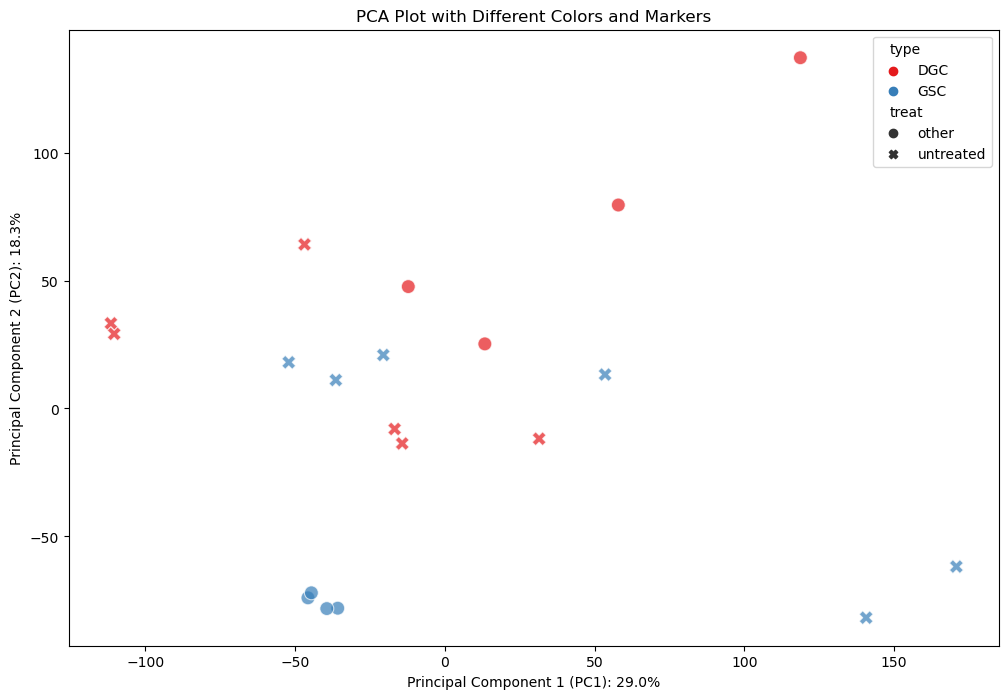

In [38]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
# 读取基因表达数据文件，假设第一列是样本名，设为索引
try:
    df_expr = pd.read_csv('combat_match_mean.txt', sep='\t', index_col=0)

    print("Gene expression DataFrame created successfully.")
except Exception as e:
    print(f"Error creating gene expression DataFrame: {e}")

# 读取包含样本标签的元数据文件
try:
    df_meta = pd.read_csv('meta.txt', sep='\t', index_col=0)
    match_meta = df_meta[df_meta['batch'].isin(['batch2', 'batch3', 'batch4'])]
    print("Metadata DataFrame created successfully.")

except Exception as e:
    print(f"Error creating Metadata DataFrame: {e}")

#确保df_meta的索引与df_expr的列名匹配
if not match_meta.index.equals(df_expr.columns):
    # 获取df_expr的列名作为样本顺序
    sample_order = df_expr.columns

    # 重新排序df_meta以匹配df_expr的列顺序
    match_meta = match_meta.reindex(sample_order)
    print(match_meta)
    print("df_meta has been reindexed to match the order of df_expr's columns.")
# 转置基因表达DataFrame，使得样本成为列，基因表达成为行
df_transposed = df_expr.T

# 使用StandardScaler进行缩放
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_transposed)

# 创建PCA对象，选择保留的主成分数量，例如2
pca = PCA(n_components=2)

# 拟合PCA并转换数据到降维后的空间
X_pca = pca.fit_transform(df_scaled)
df_pca_results = pd.DataFrame(X_pca, columns=['PC1', 'PC2'], index=df_transposed.index)


# 计算每个主成分的方差贡献百分比
explained_variance = pca.explained_variance_ratio_ * 100

#使用元数据为PCA结果上色和标记形状
color = match_meta['type']
markers = match_meta['treat']

#绘制PCA散点图
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=color, style=markers, palette='Set1', s=100, alpha=0.7)

# 设置X轴和Y轴的标签，显示PC1和PC2的方差贡献百分比
plt.xlabel(f'Principal Component 1 (PC1): {explained_variance[0]:.1f}%')
plt.ylabel(f'Principal Component 2 (PC2): {explained_variance[1]:.1f}%')

plt.title('PCA Plot with Different Colors and Markers')
# 显示图形
plt.show()


Gene expression DataFrame created successfully.
Metadata DataFrame created successfully.


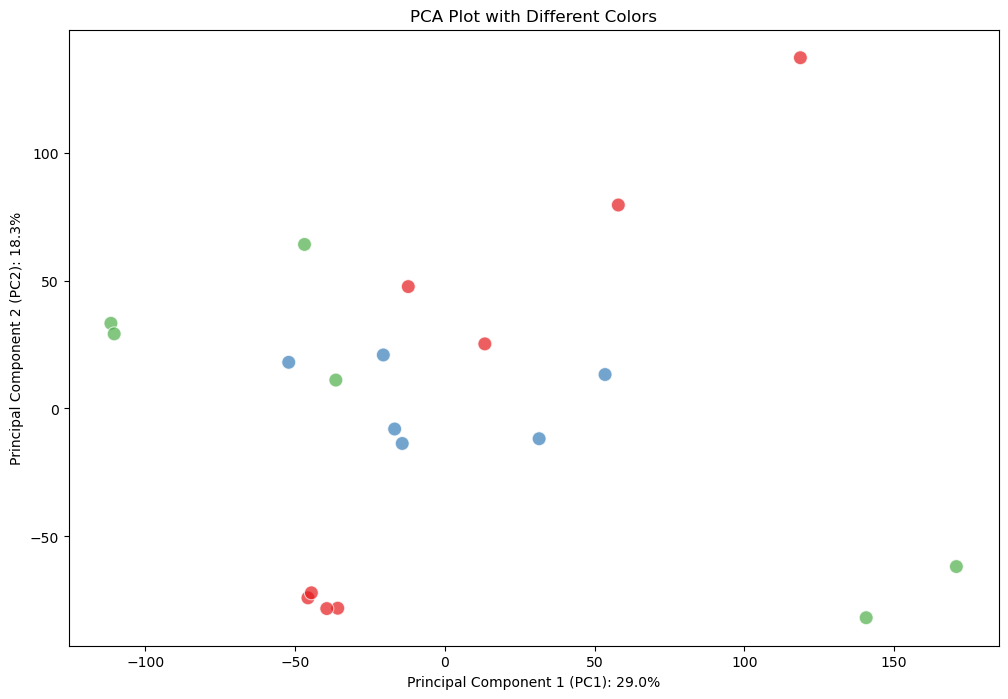

In [39]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
# 读取基因表达数据文件，假设第一列是样本名，设为索引
try:
    df_expr = pd.read_csv('combat_match_mean.txt', sep='\t', index_col=0)
    print("Gene expression DataFrame created successfully.")
except Exception as e:
    print(f"Error creating gene expression DataFrame: {e}")

# 读取包含样本标签的元数据文件
try:
    df_meta = pd.read_csv('meta.txt', sep='\t', index_col=0)
    match_meta = df_meta[df_meta['batch'].isin(['batch2', 'batch3', 'batch4'])]
    print("Metadata DataFrame created successfully.")
except Exception as e:
    print(f"Error creating Metadata DataFrame: {e}")

# 确保df_meta的索引与df_expr的列名匹配
if not match_meta.index.equals(df_expr.columns):
    # 获取df_expr的列名作为样本顺序
    sample_order = df_expr.columns
    
    # 重新排序df_meta以匹配df_expr的列顺序
    match_meta = match_meta.reindex(sample_order)
    
    print("match_meta has been reindexed to match the order of df_expr's columns.")
# 转置基因表达DataFrame，使得样本成为列，基因表达成为行
df_transposed = df_expr.T

# 使用StandardScaler进行缩放
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_transposed)

# 创建PCA对象，选择保留的主成分数量，例如2
pca = PCA(n_components=2)

# 拟合PCA并转换数据到降维后的空间
X_pca = pca.fit_transform(df_scaled)
df_pca_results = pd.DataFrame(X_pca, columns=['PC1', 'PC2'], index=df_transposed.index)
#print(df_pca_results)

# 计算每个主成分的方差贡献百分比
explained_variance = pca.explained_variance_ratio_ * 100

# 使用元数据为PCA结果上色和标记形状
color = match_meta['batch']

# 绘制PCA散点图
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=color, palette='Set1', s=100, alpha=0.7,legend=False)

# 设置X轴和Y轴的标签，显示PC1和PC2的方差贡献百分比
plt.xlabel(f'Principal Component 1 (PC1): {explained_variance[0]:.1f}%')
plt.ylabel(f'Principal Component 2 (PC2): {explained_variance[1]:.1f}%')

plt.title('PCA Plot with Different Colors')
# 显示图形
plt.show()


In [4]:
###提取匹配的数据
df = pd.read_csv('filtered_protein_coding.txt', sep=' ', index_col='gene_name', engine='python')
df_meta = pd.read_csv('meta.txt', sep='\t', index_col=0)

#dgc_meta = df_meta[df_meta['type'] == 'DGC']
match_meta = df_meta[df_meta['treat'].isin(['untreated'])]

# 步骤2: 使用筛选出的 gene_name 来选择 df 中对应的列
# 由于 gene_name 是 df 的索引，我们可以直接使用 .loc 来选择列
match_filtered_protein_coding = df.loc[:, match_meta.index]

# 现在 dgc_data 包含了 df 中所有 DGC 类型的基因数据
match_filtered_protein_coding_sorted = match_filtered_protein_coding.sort_index(ascending=False)

# 根据索引列（即 'gene_name'）分组，并对每个组应用 mean 函数计算均值
match_filtered_protein_coding_mean = match_filtered_protein_coding_sorted.groupby(level=0).mean()
match_filtered_protein_coding_mean.to_csv('mean_values_by_gene_untreated.txt', sep=' ', index=True)
print(match_filtered_protein_coding_mean.shape[0])
match_meta.to_csv('meta_untreated.txt', sep=' ', index=True)

19930


Gene expression DataFrame created successfully.
Metadata DataFrame created successfully.


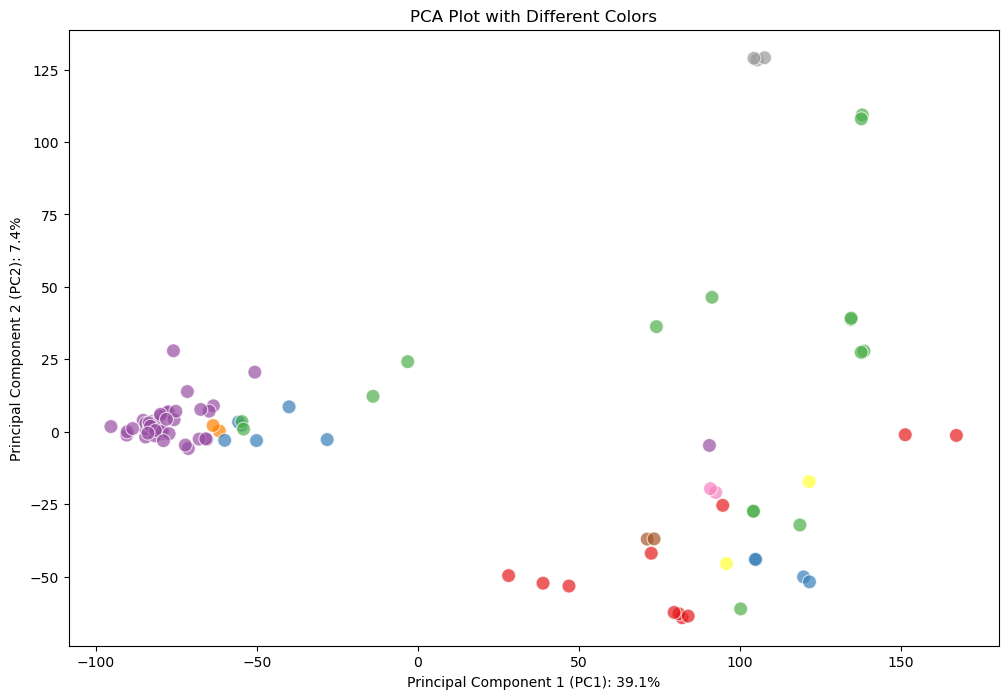

In [6]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
# 读取基因表达数据文件，假设第一列是样本名，设为索引
try:
    df_expr = pd.read_csv('mean_values_by_gene_untreated.txt', sep=' ', index_col=0)
    print("Gene expression DataFrame created successfully.")
except Exception as e:
    print(f"Error creating gene expression DataFrame: {e}")

# 读取包含样本标签的元数据文件
try:
    df_meta = pd.read_csv('meta.txt', sep='\t', index_col=0)
    match_meta = df_meta[df_meta['treat'].isin(['untreated'])]
    print("Metadata DataFrame created successfully.")
except Exception as e:
    print(f"Error creating Metadata DataFrame: {e}")

# 确保df_meta的索引与df_expr的列名匹配
if not match_meta.index.equals(df_expr.columns):
    # 获取df_expr的列名作为样本顺序
    sample_order = df_expr.columns
    
    # 重新排序df_meta以匹配df_expr的列顺序
    match_meta = match_meta.reindex(sample_order)
    
    print("match_meta has been reindexed to match the order of df_expr's columns.")
# 转置基因表达DataFrame，使得样本成为列，基因表达成为行
df_transposed = df_expr.T

# 使用StandardScaler进行缩放
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_transposed)

# 创建PCA对象，选择保留的主成分数量，例如2
pca = PCA(n_components=2)

# 拟合PCA并转换数据到降维后的空间
X_pca = pca.fit_transform(df_scaled)
df_pca_results = pd.DataFrame(X_pca, columns=['PC1', 'PC2'], index=df_transposed.index)
#print(df_pca_results)

# 计算每个主成分的方差贡献百分比
explained_variance = pca.explained_variance_ratio_ * 100

# 使用元数据为PCA结果上色和标记形状
color = match_meta['batch']

# 绘制PCA散点图
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=color, palette='Set1', s=100, alpha=0.7,legend=False)

# 设置X轴和Y轴的标签，显示PC1和PC2的方差贡献百分比
plt.xlabel(f'Principal Component 1 (PC1): {explained_variance[0]:.1f}%')
plt.ylabel(f'Principal Component 2 (PC2): {explained_variance[1]:.1f}%')

plt.title('PCA Plot with Different Colors')
# 显示图形
plt.show()


Gene expression DataFrame created successfully.
Metadata DataFrame created successfully.


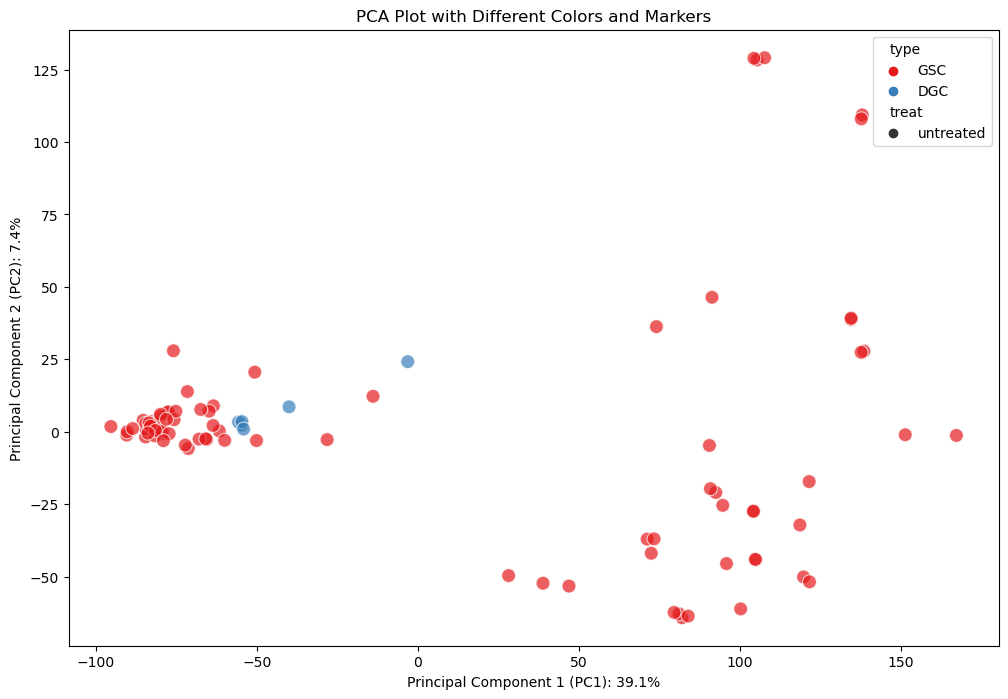

In [7]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
# 读取基因表达数据文件，假设第一列是样本名，设为索引
try:
    df_expr = pd.read_csv('mean_values_by_gene_untreated.txt', sep=' ', index_col=0)
    print("Gene expression DataFrame created successfully.")
except Exception as e:
    print(f"Error creating gene expression DataFrame: {e}")

# 读取包含样本标签的元数据文件
try:
    df_meta = pd.read_csv('meta.txt', sep='\t', index_col=0)
    match_meta = df_meta[df_meta['treat'].isin(['untreated'])]
    print("Metadata DataFrame created successfully.")

except Exception as e:
    print(f"Error creating Metadata DataFrame: {e}")

# 确保df_meta的索引与df_expr的列名匹配
if not match_meta.index.equals(df_expr.columns):
    # 获取df_expr的列名作为样本顺序
    sample_order = df_expr.columns

    # 重新排序df_meta以匹配df_expr的列顺序
    match_meta = match_meta.reindex(sample_order)
    print(match_meta)
    print("df_meta has been reindexed to match the order of df_expr's columns.")
# 转置基因表达DataFrame，使得样本成为列，基因表达成为行
df_transposed = df_expr.T

# 使用StandardScaler进行缩放
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_transposed)

# 创建PCA对象，选择保留的主成分数量，例如2
pca = PCA(n_components=2)

# 拟合PCA并转换数据到降维后的空间
X_pca = pca.fit_transform(df_scaled)
df_pca_results = pd.DataFrame(X_pca, columns=['PC1', 'PC2'], index=df_transposed.index)


# 计算每个主成分的方差贡献百分比
explained_variance = pca.explained_variance_ratio_ * 100

#使用元数据为PCA结果上色和标记形状
color = match_meta['type']
markers = match_meta['treat']

#绘制PCA散点图
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=color, style=markers, palette='Set1', s=100, alpha=0.7)

# 设置X轴和Y轴的标签，显示PC1和PC2的方差贡献百分比
plt.xlabel(f'Principal Component 1 (PC1): {explained_variance[0]:.1f}%')
plt.ylabel(f'Principal Component 2 (PC2): {explained_variance[1]:.1f}%')

plt.title('PCA Plot with Different Colors and Markers')
# 显示图形
plt.show()
